In [53]:
#IMPORTS TO PROJECT "FLATS & Apartaments"

#Step 1
import os
import tarfile
from six.moves import urllib

#Step 2
import pandas as pd

#Step 3
%matplotlib inline
import matplotlib.pyplot as plt

#Step 4
import numpy as np

#Step 5
from sklearn.model_selection import train_test_split

#Step 6 
from sklearn.model_selection import StratifiedShuffleSplit

#Step 7
from pandas.tools.plotting import scatter_matrix


In [27]:
#TDD IMPLEMENTATION
test_general_values(HOUSING_URL) and \
test_general_values(HOUSING_PATH) and \
test_is_logic_function(chech_is_path_exist()) and \
test_is_string_function(get_path_to_csv_file()) and \
test_is_given_type_function(load_housing_data(),pd.core.frame.DataFrame) and \
test_is_given_type_function(display_value_counts_of_attribute(),pd.core.series.Series)

True

In [2]:
#General Paths

def test_general_values(pathToCheck):
    if(pathToCheck):
        #print("Value of variable ",type(pathToCheck)," is equal:",pathToCheck)
        return True
    else:
        #print("Value of variable ",type(pathToCheck)," not exist")
        return False
        
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("zestaw danych", "mieszkania")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [3]:
def test_is_logic_function(logic_function_to_check):
    if type(logic_function_to_check) == bool:
        return True
    else:
        return False

def chech_is_path_exist(housing_path = HOUSING_PATH):
    return os.path.isdir(housing_path)

def make_directory_in_housing_path(housing_path = HOUSING_PATH):
    os.makedirs(housing_path)

def fetch_housing_data(housing_url = HOUSING_URL, housing_path = HOUSING_PATH):
    if not chech_is_path_exist():
        make_directory_in_housing_path()
        tgz_rep_path = os.path.join(housing_path,"housing.tgz")
        urllib.request.urlretrieve(housing_url,tgz_rep_path)
        housing_tgz = tarfile.open(tgz_rep_path)
        housing_tgz.extractall(path=housing_path)
        housing_tgz.close()
        print("Confirm")
    else:
        print("Not Confirm - path exists")
        

fetch_housing_data()

Not Confirm - path exists


In [5]:
def test_is_string_function(string_function_to_check):
    if type(string_function_to_check) == str:
        return True
    else:
        return False

def test_is_given_type_function(function_to_check,type_of_returned_parameter):
    if type(function_to_check) == type_of_returned_parameter:
        return True
    else:
        return False
def get_path_to_csv_file(housing_path = HOUSING_PATH,name_of_file="housing.csv"):
    return os.path.join(housing_path,name_of_file)

def load_housing_data():
    csv_path = get_path_to_csv_file()
    return pd.read_csv(csv_path)

housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
def display_value_counts_of_attribute(dataFrame = housing,name_of_attribute = "ocean_proximity"):
    return dataFrame[name_of_attribute].value_counts()
    
display_value_counts_of_attribute()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
def display_histograms_of_dataFrame_attributes(dataFrame=housing):
    dataFrame.hist(bins=50, figsize=(20,15))
    plt.show()

Histograms of attributes in DataFrame housing

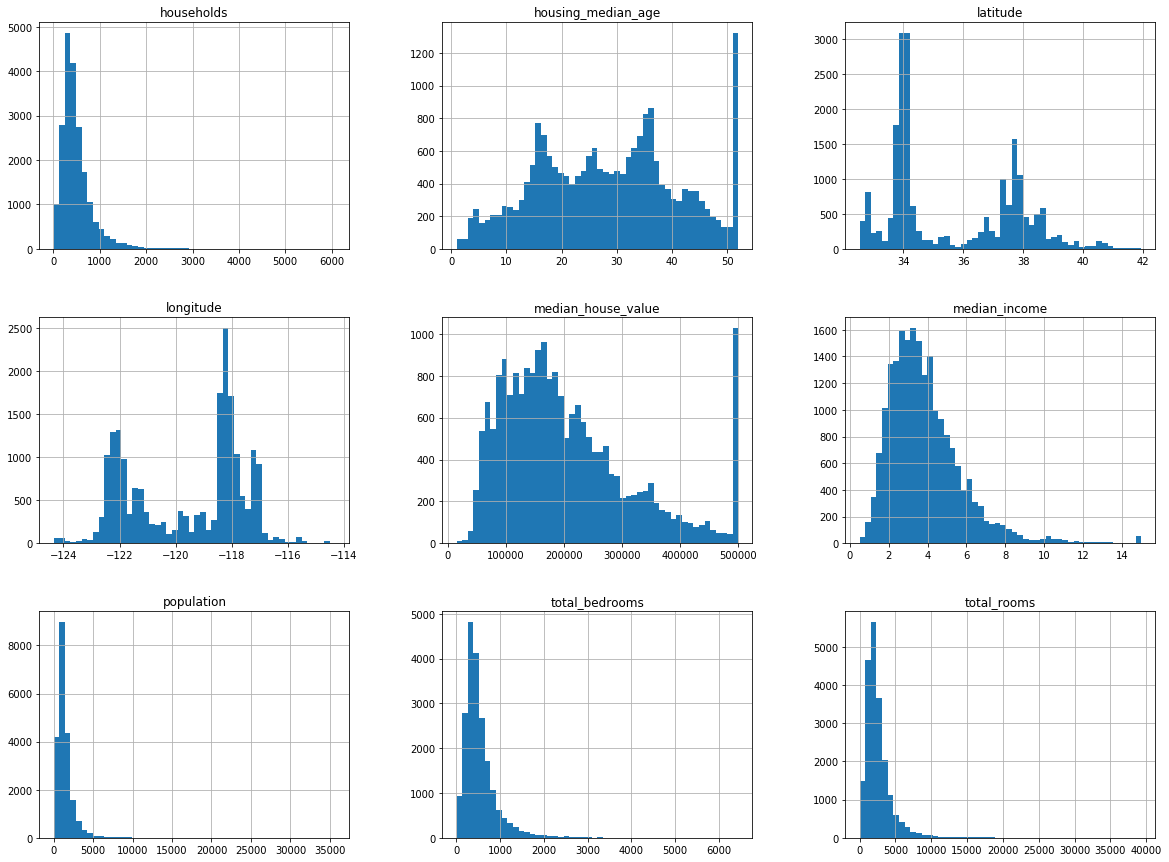

In [10]:
display_histograms_of_dataFrame_attributes()

In [11]:
def split_train_test(data, test_ratio,seed_random=True):
    if seed_random == True:
        np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int (len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices] 

train_set, test_set = split_train_test(housing, 0.2)
print("Uczące: ",len(train_set),", testowe: ",len(test_set))


Uczące:  16512 , testowe:  4128


In [44]:
train_set_sklearn , test_set_sklearn = train_test_split(housing, test_size = 0.2, random_state=42)

print("Uczące: ",len(train_set_sklearn),", testowe: ",len(test_set_sklearn))

Uczące:  16512 , testowe:  4128


In [12]:
housing["income_cat"] = np.ceil(housing["median_income"] /1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace = True)

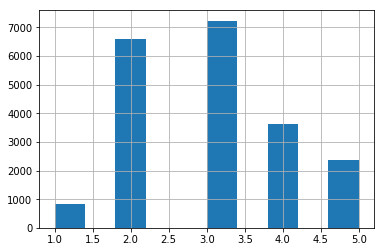

In [13]:
housing["income_cat"].hist();

In [14]:
display_value_counts_of_attribute(name_of_attribute = "income_cat") / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [18]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    

In [24]:
#Usunięcie atrybutu income_cat - wywołane raz

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat",axis=1,inplace=True)


KeyError: "['income_cat'] not found in axis"

In [26]:
#kopiowanie 
housing = strat_train_set.copy()

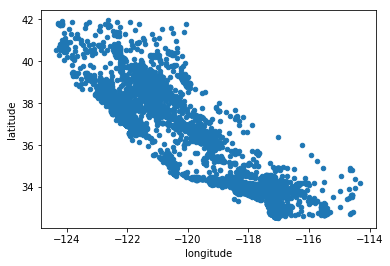

In [28]:
housing.plot(kind="scatter", x="longitude",y="latitude");

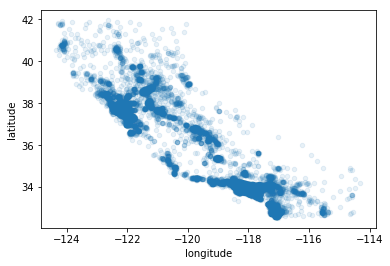

In [30]:
housing.plot(kind="scatter", x="longitude",y="latitude",alpha=0.1);

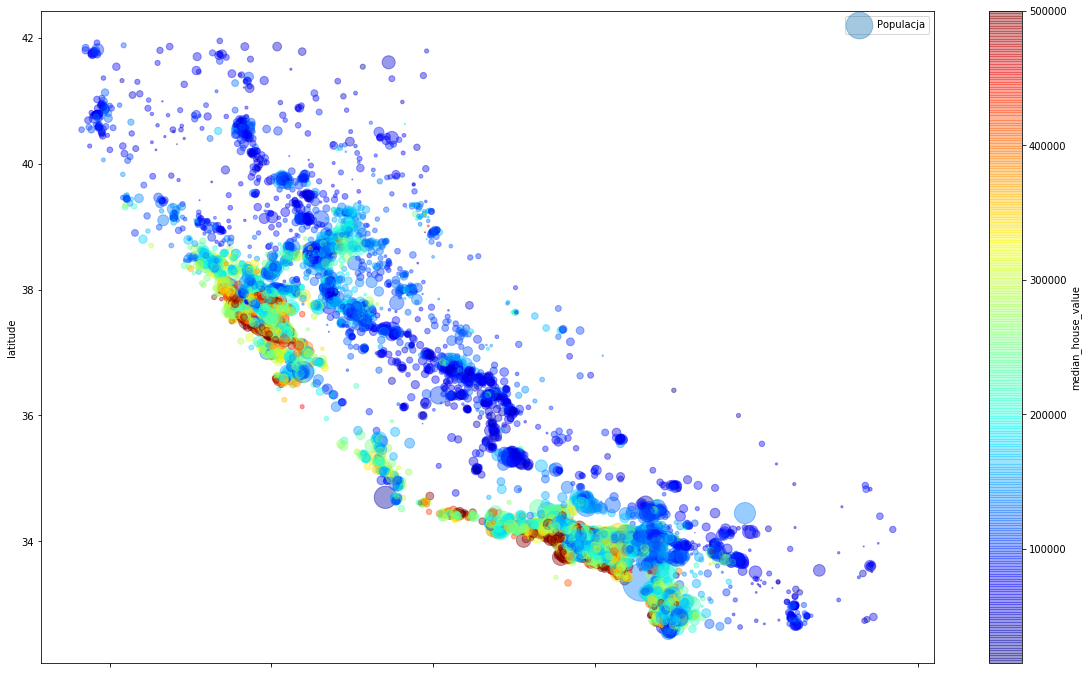

In [42]:
housing.plot(kind="scatter", 
             x = "longitude",
             y = "latitude",
             alpha = 0.4,
             s = housing["population"]/25,
             label = "Populacja",
             figsize=(20,12),
             c="median_house_value",
             cmap=plt.get_cmap("jet"),
             colorbar=True,
            );
plt.legend();

In [44]:
#Poszukiwanie korelacji

corr_matrix = housing.corr()

In [46]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


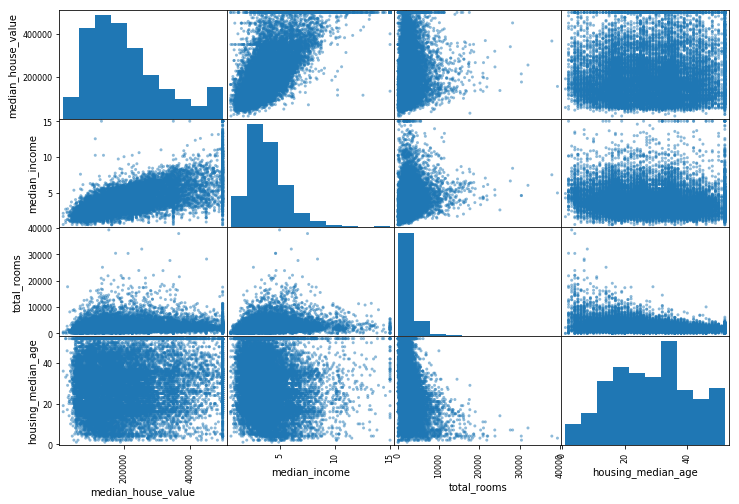

In [54]:
attributes = ["median_house_value","median_income","total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes],figsize=(12,8));

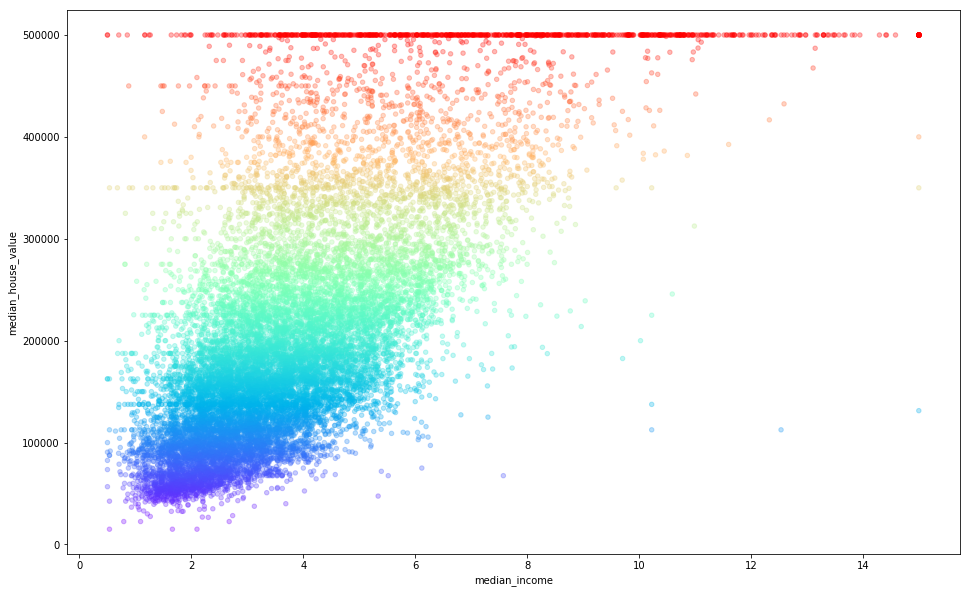

In [74]:
housing.plot(kind="scatter", 
             figsize=(16,10),
             x = "median_income",
             y = "median_house_value",
             
             c="median_house_value",
             cmap=plt.get_cmap("rainbow"),
             colorbar=False,
             
             alpha=0.3   
            );
